Model Notebook

This is the notebook for model in age gender detector. Here, we will extract the data ,train it and fit it into our model, and will evaluate our results and optimize the model for better results.

Import the Necessary Libraries

In [1]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

Extract data from the dataset

In [2]:
fldr="./UTkFace"

In [3]:
import os
flies=os.listdir(fldr)

Create List of images from the dataset

In [4]:
ages=[]
genders=[]
images=[]

for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)

    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

./UTkFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTkFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTkFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTkFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTkFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTkFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTkFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTkFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTkFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTkFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTkFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTkFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTkFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTkFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTkFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTkFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTkFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTkFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTkFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTkFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTkFace/10_0_0_2017

Create List of Age and Gender from the dataset

In [5]:
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

Viewing a sample

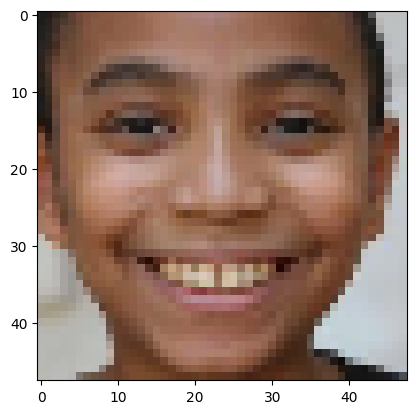

In [6]:
plt.imshow(images[87])

In [7]:
print(ages[87])

10


In [8]:
print(genders[87])

0


Saving images array,ages array, and genders array in the system

In [9]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [10]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

Finding the no. of Male and Female samples respectively

In [11]:
values, counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


Plotting the No. of Male and Female Samples

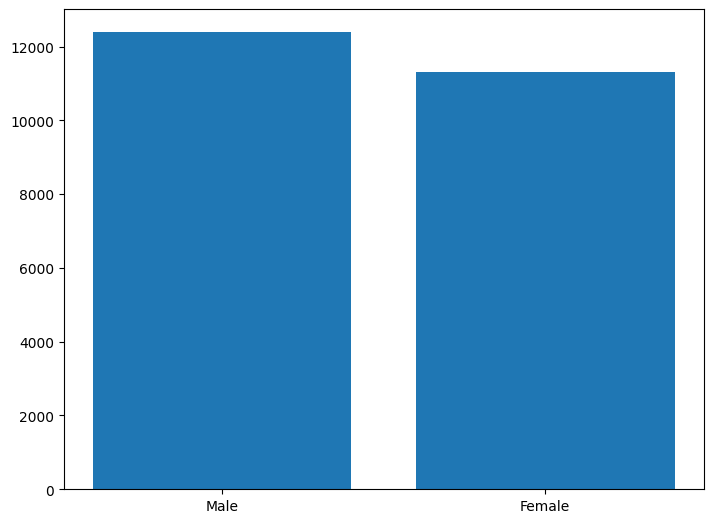

In [12]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

Finding The no. of samples in each age

In [13]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


Converting Age counts to lists

In [14]:
val=values.tolist()
cnt=counts.tolist()

Plotting The Samples Agewise

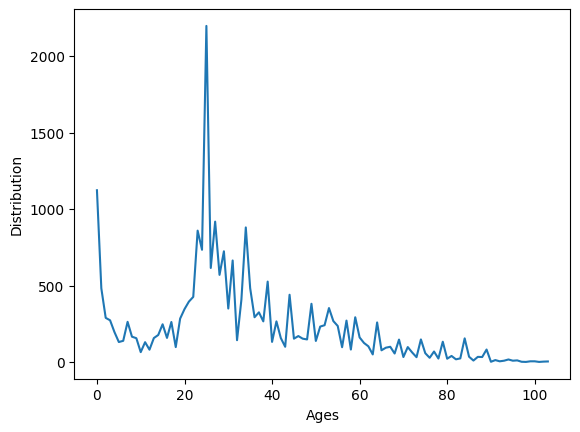

In [15]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

Definig Labes for Output

In [16]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

Creating another list of images from existing one
For better learning

In [17]:
images_f_2=images_f/255

In [18]:
images_f_2.shape

(23708, 48, 48, 3)

In [19]:
labels_f=np.array(labels)

Splitting The Dataset into test and train

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [22]:
Y_train[0:5]

array([[38,  0],
       [45,  0],
       [10,  0],
       [54,  1],
       [36,  0]])

Splitting 'Y_test' and 'Y_train' further
For better understanding

In [23]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [24]:
Y_train_2[0][0:5]

array([0, 0, 0, 1, 0])

In [25]:
Y_train_2[1][0:5]

array([38, 45, 10, 54, 36])

Defining the Model

In [26]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [27]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten= Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy","accuracy"])
    return model

In [28]:
Model=model((48,48,3))

In [29]:
Model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 48, 48,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 48, 48,    │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ dropout[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 24, 24,    │          0 │ dropout_1[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 12, 12,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 12,    │          0 │ dropout_2[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 128) │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 6, 6, 256) │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 6, 6, 256) │          0 │ dropout_3[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 3, 3, 256) │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint

Initializing the Model

In [31]:
fle_s='Age_sex_detection.keras'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

Running the Model

In [32]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=100,callbacks=callback_list)

Epoch 1/100
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - age_out_accuracy: 0.0450 - loss: 18.3247 - sex_out_accuracy: 0.5403
Epoch 1: val_loss improved from inf to 17.60416, saving model to Age_sex_detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - age_out_accuracy: 0.0450 - loss: 18.3132 - sex_out_accuracy: 0.5404 - val_age_out_accuracy: 0.0486 - val_loss: 17.6042 - val_sex_out_accuracy: 0.6400
Epoch 2/100
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - age_out_accuracy: 0.0485 - loss: 14.2593 - sex_out_accuracy: 0.6542
Epoch 2: val_loss improved from 17.60416 to 15.42848, saving model to Age_sex_detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - age_out_accuracy: 0.0485 - loss: 14.2517 - sex_out_accuracy: 0.6545 - val_age_out_accuracy: 0.0331 - val_loss: 15.4285 - val_sex_out_accuracy: 0.7365
Epoch 3/100
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - age_out_accuracy: 0.0443 - loss: 11.4152 - sex_out_accuracy: 0.7374
Epoch 3: val_loss improved from 15.42848 to 15.26441, s

Model Evaluation

In [33]:
Model.evaluate(X_test,Y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - age_out_accuracy: 0.0481 - loss: 7.3870 - sex_out_accuracy: 0.8935


[7.492396354675293, 0.048591192811727524, 0.8888139128684998]

In [34]:
pred=Model.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [35]:
pred[1]

array([[25.212807],
       [29.55347 ],
       [24.373857],
       ...,
       [29.686056],
       [33.636063],
       [ 9.488604]], dtype=float32)

Plotting Loss

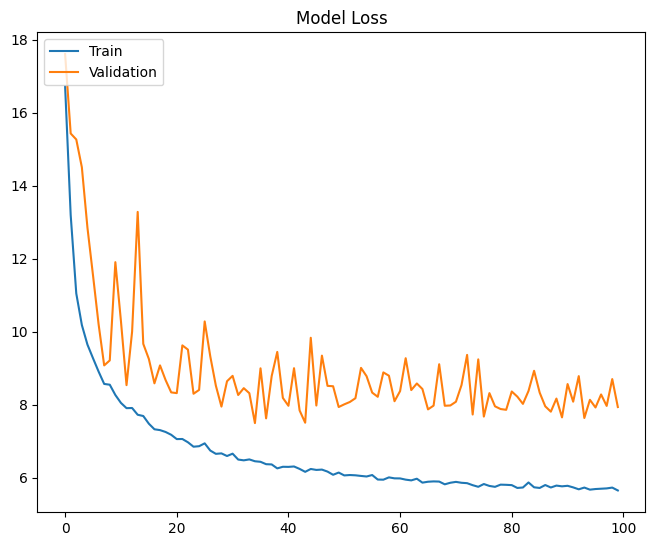

In [36]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

Plotting Sex Accuracy

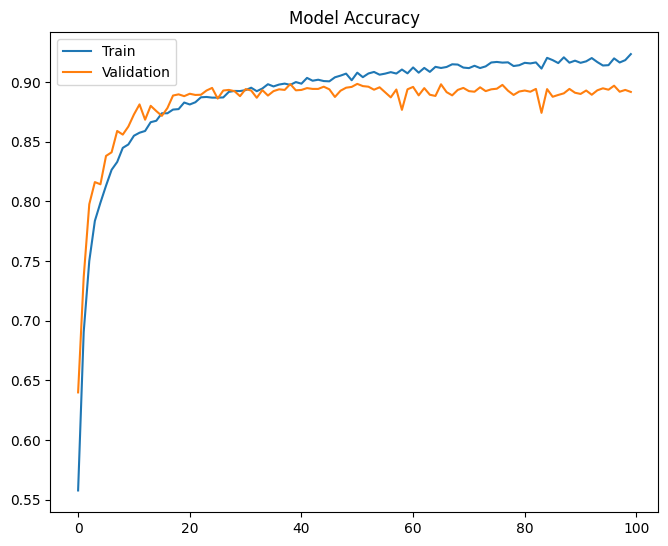

In [37]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

Plotting Gender Accuracy

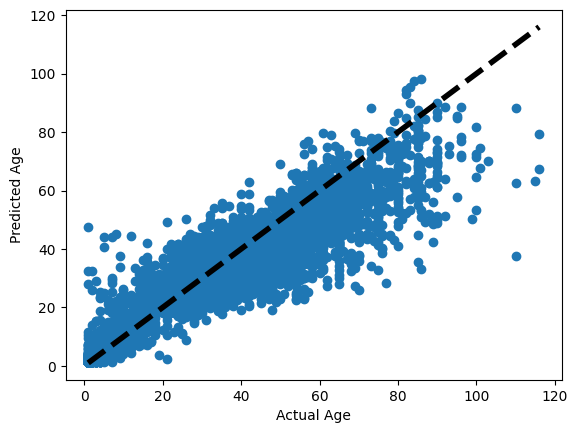

In [38]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

Making Report of the Model (Gender Only)

In [39]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1
    

C:\Users\harsh\AppData\Local\Temp\ipykernel_13104\2690061568.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [41]:
report=classification_report(Y_test_2[0],Pred_l)

In [42]:
print(report)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      3086
           1       0.88      0.89      0.89      2841

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



Making Heatmap of the Model (Gender only)

In [43]:
results=confusion_matrix(Y_test_2[0],Pred_l)

In [44]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<Axes: >

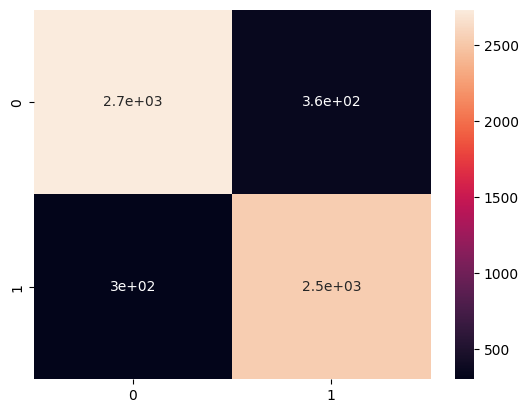

In [45]:
import seaborn as sns
sns.heatmap(results,annot=True)

Testing The Images Ourself

In [46]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])

Test 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Age is 87
Predicted Gender is Female


C:\Users\harsh\AppData\Local\Temp\ipykernel_13104\964136747.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\harsh\AppData\Local\Temp\ipykernel_13104\964136747.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


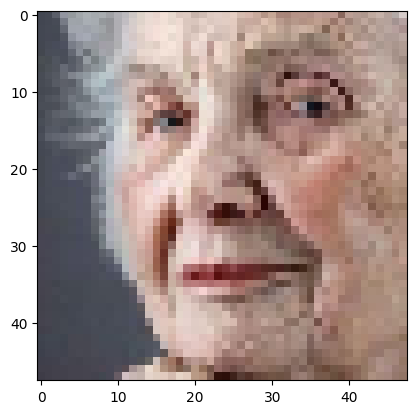

In [47]:
test_image(4,images_f,images_f_2,Model)

Test 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Age is 12
Predicted Gender is Male


C:\Users\harsh\AppData\Local\Temp\ipykernel_13104\964136747.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\harsh\AppData\Local\Temp\ipykernel_13104\964136747.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


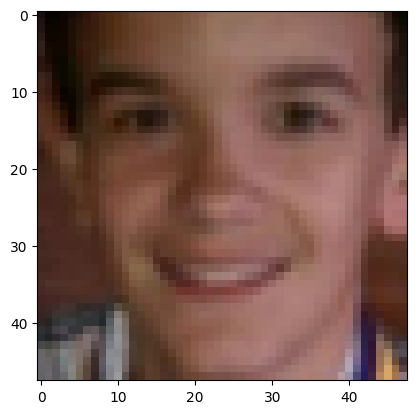

In [48]:
test_image(23,images_f,images_f_2,Model)

Test 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted Age is 12
Predicted Gender is Female


C:\Users\harsh\AppData\Local\Temp\ipykernel_13104\964136747.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\harsh\AppData\Local\Temp\ipykernel_13104\964136747.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


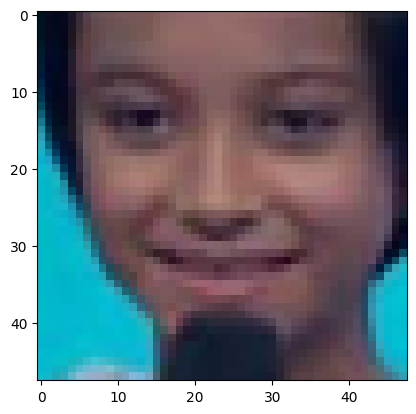

In [49]:
test_image(168,images_f,images_f_2,Model)